1. Exploratory Data Analysis 

My dataset is divided into the following columns:
brokered_by, status, price, bed, bath, acre_lot, street, city, state, zip_code, house_size, prev_sold_date

brokered_by is a numerical identifier for the realtor and is not required in our experiment. The status attribute is a boolean for if the house is for sale and because all the couses are labeled for sale in the dataset I will be dropping this column as well. Price will the the independent variable in our experiment that we will try to predict. bed, bath, acre_lot, street, city, state, and house_size are identifiers that will impact the price of the house, we will be training off these columns to predict price, the time will not be a factor in this experiment as there are too many missing values in the dataset for this attribute.

2. Baseline method implementation and result analysis 

my data is multidimensional so I will need to probably evaluate an ensemble model that can fit the data in higher dimensions. I will break Price off of the dataframe and set it to Y. Then I will set the rest of the dataframe to X and scale the data. Then I will train on the scaled X to predict Y.

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import xgboost as xgb
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import json
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

**Dataset too large to include in repository**

In [188]:
df = pd.read_csv('./realtor-data.csv')

df.head(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.0,NaN
8,81909.0,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.0,NaN
9,65672.0,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.0,NaN


In [189]:
df.shape

(2226382, 12)

In [190]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [191]:
#preprocess and clean data

#remove unnecessary data
cols_to_drop = [ 'brokered_by', 'status', 'street', 'city', 'state', 'prev_sold_date' ]
df = df.drop( columns=cols_to_drop )

# Check for negative prices and remove corresponding rows
#df = df[df['price'] >= 0]

# check if there is NaN in the dataset
print( df.isnull().sum() )

#Drop NaNs if there is any
df = df.dropna()


price           1541
bed           481317
bath          511771
acre_lot      325589
zip_code         299
house_size    568484
dtype: int64


In [192]:
df.shape

(1360627, 6)

In [193]:
# Designate cols

Y= df['price'].values
X= df.drop( columns=['price'] ).values

In [194]:
# Normalize X

scaler = StandardScaler()
Scaled_X = scaler.fit_transform( X )

In [195]:
np.isnan( Scaled_X ).sum()
np.unique( Y ) 

array([0.00e+00, 1.00e+00, 2.00e+00, ..., 1.65e+08, 1.69e+08, 5.15e+08])

In [196]:
# Use dimensionality reduce to save memory
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 20000
data_subset_x = Scaled_X[rndperm[:N],:].copy()
data_subset_y = Y[rndperm[:N]].copy()

print( data_subset_x.shape )

(20000, 5)


**un-needed PCA, commented out t-SNE because I dont need to sepnd the time generating the plot each test run**

In [197]:
#pca = PCA( n_components=3 )
#pca_result = pca.fit_transform( data_subset_x )

In [198]:
#pca_df = pd.DataFrame( pca_result, columns=[ 'PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3' ] )

# Concatenate pca_df with data_subset_x along the columns axis
#data_subset_x = np.concatenate( (data_subset_x, pca_df), axis=1 )

In [199]:
#You can create or remove cells as per your need
#tsne = TSNE( n_components=2, verbose=1, perplexity=40, n_iter=300 )
#tsne_results = tsne.fit_transform( data_subset_x )

In [200]:
#tsne_df = pd.DataFrame(tsne_results, columns=['TSNE_Component_1', 'TSNE_Component_2'])

# Concatenate data_subset_x with tsne_df along the columns axis
#data_subset_x = np.concatenate((data_subset_x, tsne_df), axis=1)

In [201]:
#df_plot = pd.concat( [ pd.DataFrame(data_subset_x), pd.DataFrame(data_subset_y, columns=['price']) ], axis=1 )
#df_plot.columns

In [202]:
#plt.figure(figsize=(16,10))
#sns.scatterplot(x=data_subset_x[:, 8], y=data_subset_x[:, 9], data=df_plot)
#plt.title('Scatter Plot of Data Subset with t-SNE')
#plt.xlabel('t-SNE Component 1')
#plt.ylabel('t-SNE Component 2')

3. Proposal for next steps
create XGBoost baselone model provided from an existing experiment.
create linear baseline model, attempt random forest model. balance dataset and run both again

In [203]:
print("Minimum price:", Y.min())
print("Maximum price:", Y.max())

Minimum price: 0.0
Maximum price: 515000000.0


Text(0, 0.5, 'Number of Rows')

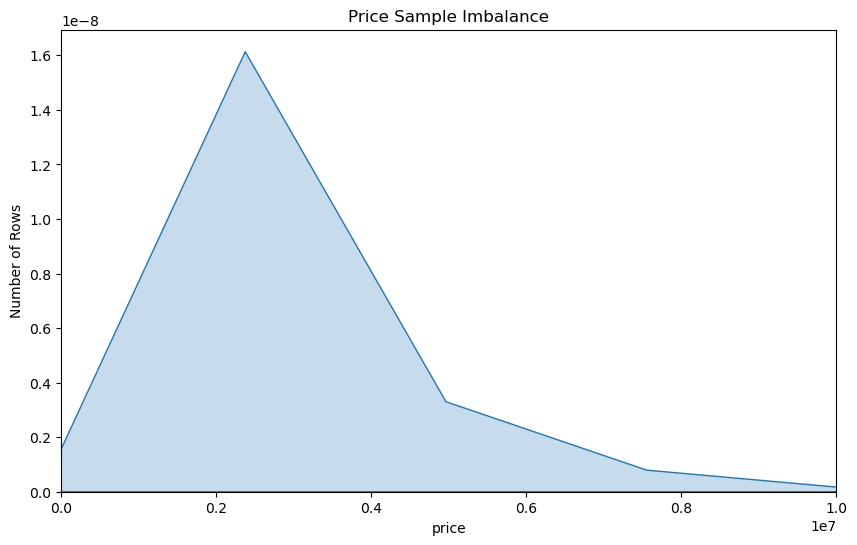

In [204]:
# visualize imbalanced dataset
plt.figure(figsize=(10, 6))
sns.kdeplot(Y, fill=True)
plt.xlim(0, 10000000)

plt.title('Price Sample Imbalance')

plt.xlabel('price')
plt.ylabel('Number of Rows')

In [205]:
xtrain, xtest, ytrain, ytest = train_test_split( Scaled_X, Y, test_size=0.2, random_state=42 )

**Begin testing and plotting models**

In [206]:
#baseline XGBoost model
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)
xgb_model.fit(xtrain, ytrain)
y_pred = xgb_model.predict(xtest)
rmse = root_mean_squared_error(ytest, y_pred)

print(rmse)
xgb_model.score(xtest, ytest)

834472.5700764962


0.47803983885183976

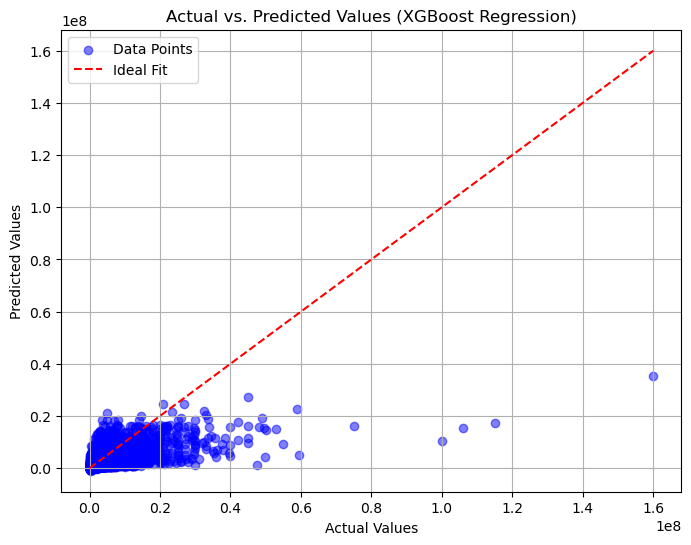

In [207]:
# Predictions using the XGBoost model
xgb_predictions = xgb_model.predict(xtest)

# Plot the scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, xgb_predictions, color='blue', alpha=0.5, label='Data Points')

# Plot the reference line (ideal fit)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

plt.title('Actual vs. Predicted Values (XGBoost Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [208]:
# baseline linear model
lr_model = linear_model.LinearRegression()
lr_model.fit( xtrain, ytrain )

lr_model.score( xtest, ytest )

0.1888493435148244

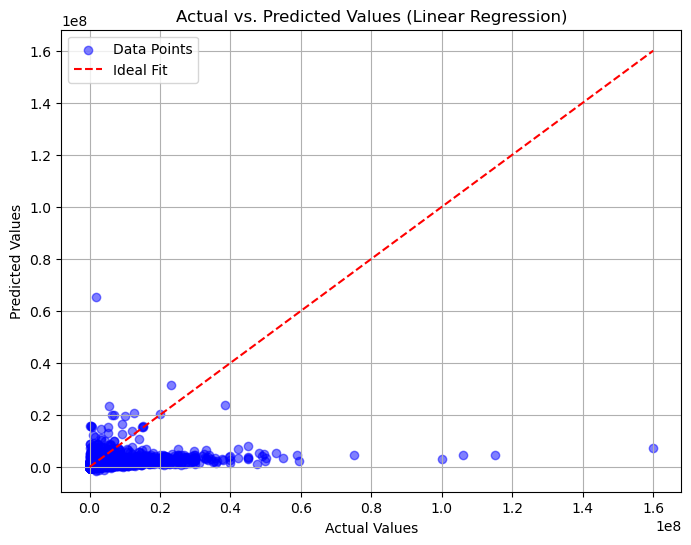

In [209]:
predictions = lr_model.predict(xtest)

# Plot the scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, predictions, color='blue', alpha=0.5, label='Data Points')

plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [210]:
# Ridge Regression
ridge_model = Ridge(alpha=100.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(xtrain, ytrain)
ridge_score = ridge_model.score(xtest, ytest)
ridge_predictions = ridge_model.predict(xtest)

# Lasso Regression
lasso_model = Lasso(alpha=100.0)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(xtrain, ytrain)
lasso_score = lasso_model.score(xtest, ytest)
lasso_predictions = lasso_model.predict(xtest)

# Compare performance
print("Ridge Regression R-squared:", ridge_score)
print("Lasso Regression R-squared:", lasso_score)

Ridge Regression R-squared: 0.18884664987428446
Lasso Regression R-squared: 0.18884092957617038


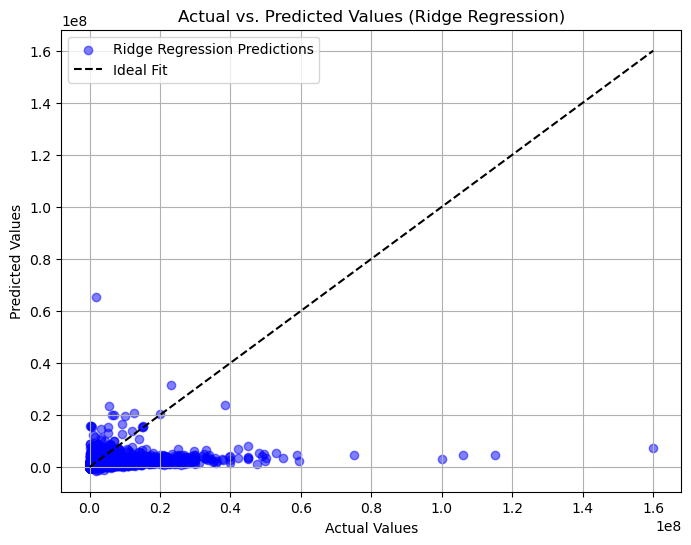

In [211]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ridge_predictions, color='blue', alpha=0.5, label='Ridge Regression Predictions')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='black', label='Ideal Fit')
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

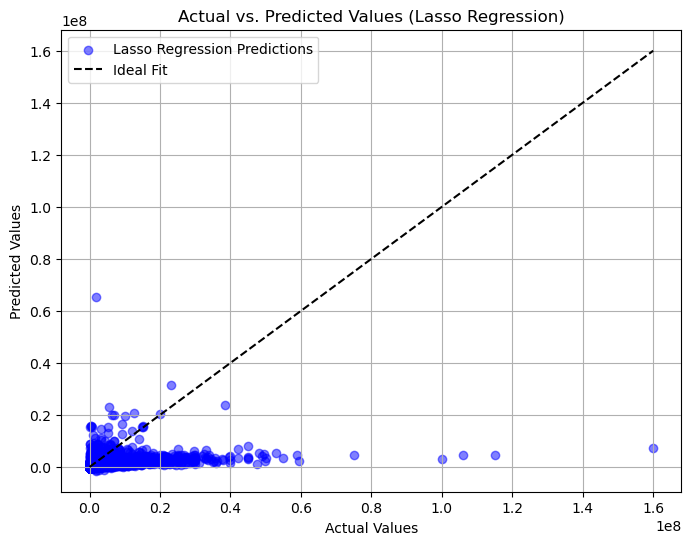

In [212]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, lasso_predictions, color='blue', alpha=0.5, label='Lasso Regression Predictions')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='black', label='Ideal Fit')
plt.title('Actual vs. Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [213]:
# random forest model
#rf_model = RandomForestRegressor()

#rf_model.fit( xtrain, ytrain )

#rf_model.score( xtest, ytest )

In [214]:
# Predictions using the XGBoost model
#rf_predictions = rf_model.predict(xtest)

# Plot the scatter plot of actual vs. predicted values
#plt.figure(figsize=(8, 6))
#plt.scatter(ytest, rf_predictions, color='blue', alpha=0.5, label='Data Points')

# Plot the reference line (ideal fit)
#plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

#plt.title('Actual vs. Predicted Values (Random Forest Regression)')
#plt.xlabel('Actual Values')
#plt.ylabel('Predicted Values')
#plt.legend()
#plt.grid(True)
#plt.show()

In [215]:
# gradient boosting model
gb_model = GradientBoostingRegressor()

gb_model.fit( xtrain, ytrain )

gb_model.score( xtest, ytest )

0.47917157916682285

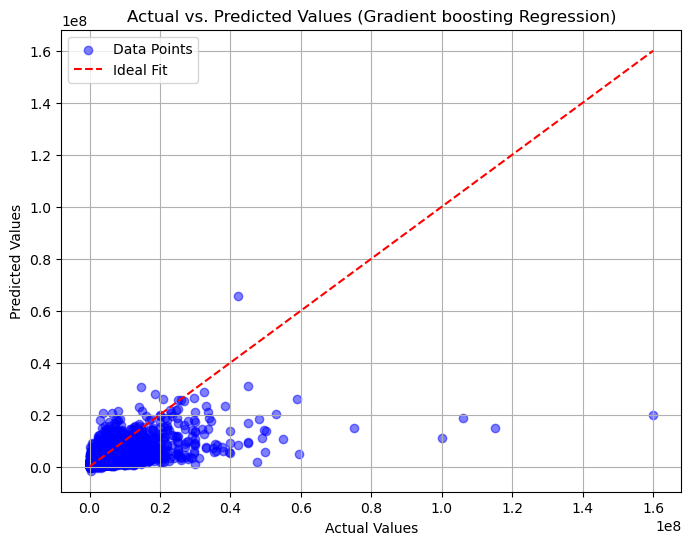

In [216]:
# Predictions using the XGBoost model
gb_predictions = gb_model.predict(xtest)

# Plot the scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, gb_predictions, color='blue', alpha=0.5, label='Data Points')

# Plot the reference line (ideal fit)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

plt.title('Actual vs. Predicted Values (Gradient boosting Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [217]:
poly = PolynomialFeatures( degree=2 )
poly_features = poly.fit_transform( xtrain )

poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit( poly_features, ytrain )

poly_reg_model.score( poly_features, ytrain )

0.2071773535338619

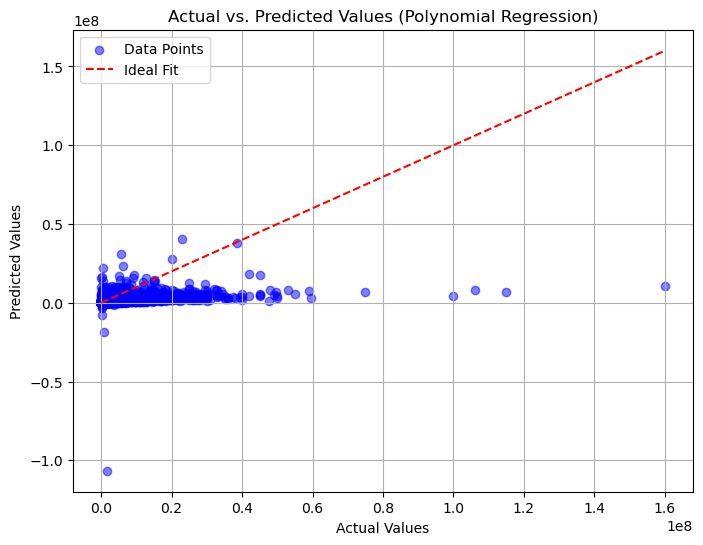

In [218]:
poly_features_test = poly.fit_transform(xtest)
predictions_poly = poly_reg_model.predict(poly_features_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, predictions_poly, color='blue', alpha=0.5, label='Data Points')

# Plot the reference line (ideal fit)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [219]:
# rebalancing data
smote = SMOTE(sampling_strategy={1: 1000})
#random_oversampler = RandomOverSampler()
#X_res, y_res = random_oversampler.fit_resample( Scaled_X, Y )
X_res, y_res = smote.fit_resample( Scaled_X, Y )

xtrain, xtest, ytrain, ytest = train_test_split( X_res, y_res, test_size=0.20 )

Text(0, 0.5, 'Number of Rows')

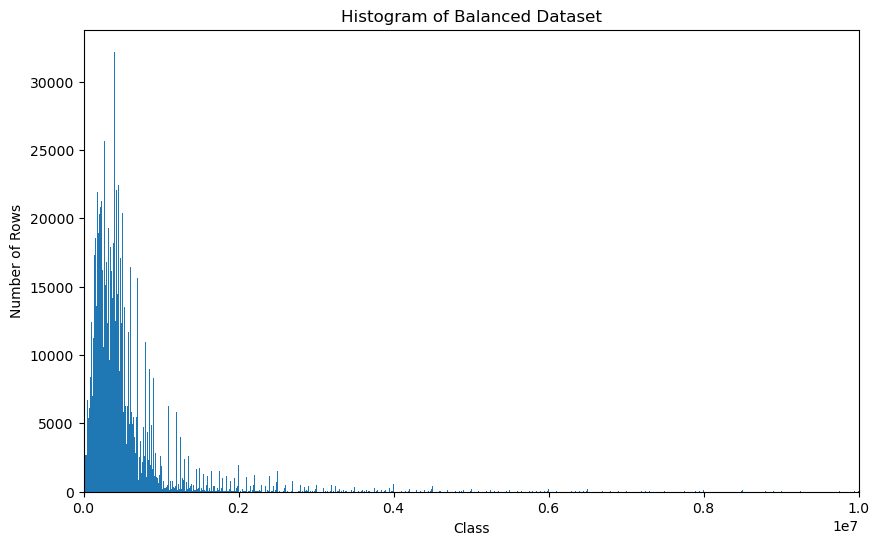

In [220]:
plt.figure(figsize=(10, 6))
plt.hist( y_res, bins=len( np.unique(y_res) ) )
plt.xlim(0, 10000000)

plt.title('Histogram of Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Rows')

**Begin testing and plotting models with balanced dataset**

In [221]:
#baseline XGBoost model
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)
xgb_model.fit(xtrain, ytrain)
y_pred = xgb_model.predict(xtest)
rmse = root_mean_squared_error(ytest, y_pred)

print(rmse)
xgb_model.score(xtest, ytest)

826533.4759968413


0.45674429873948763

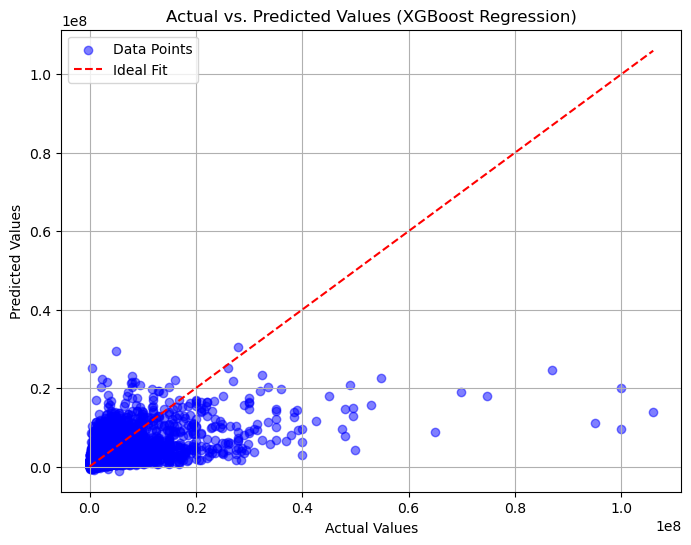

In [222]:
# Predictions using the XGBoost model
xgb_predictions = xgb_model.predict(xtest)

# Plot the scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, xgb_predictions, color='blue', alpha=0.5, label='Data Points')

# Plot the reference line (ideal fit)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

plt.title('Actual vs. Predicted Values (XGBoost Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [223]:
# baseline linear model
lr_model = linear_model.LinearRegression()
lr_model.fit( xtrain, ytrain )

lr_model.score( xtest, ytest )

0.19529757260226221

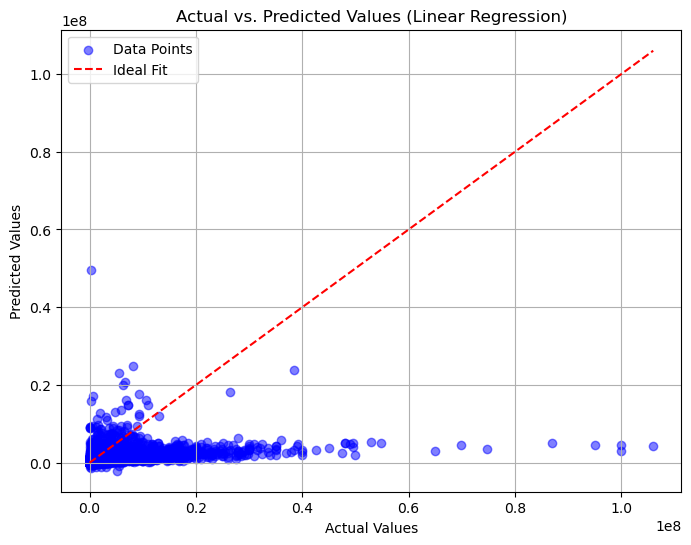

In [224]:
predictions = lr_model.predict(xtest)

# Plot the scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, predictions, color='blue', alpha=0.5, label='Data Points')

plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(xtrain, ytrain)
ridge_score = ridge_model.score(xtest, ytest)
ridge_predictions = ridge_model.predict(xtest)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(xtrain, ytrain)
lasso_score = lasso_model.score(xtest, ytest)
lasso_predictions = lasso_model.predict(xtest)

# Compare performance
print("Ridge Regression R-squared:", ridge_score)
print("Lasso Regression R-squared:", lasso_score)

Ridge Regression R-squared: 0.19529754957578838
Lasso Regression R-squared: 0.19529750922056655


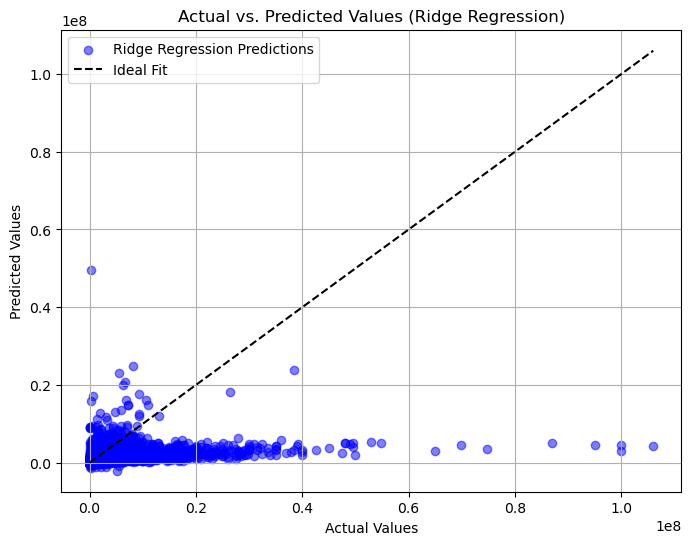

In [226]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ridge_predictions, color='blue', alpha=0.5, label='Ridge Regression Predictions')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='black', label='Ideal Fit')
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

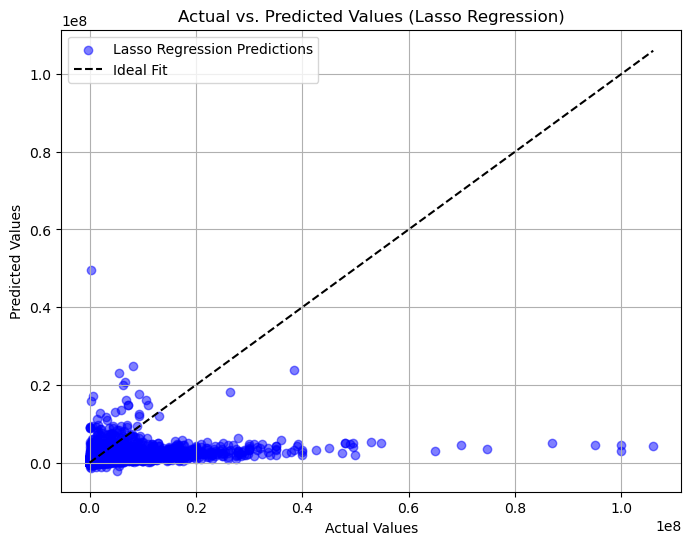

In [227]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, lasso_predictions, color='blue', alpha=0.5, label='Lasso Regression Predictions')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='black', label='Ideal Fit')
plt.title('Actual vs. Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [228]:
# random forest model
#rf_model = RandomForestRegressor()

#rf_model.fit( xtrain, ytrain )

#rf_model.score( xtest, ytest )

In [229]:
#predictions = rf_model.predict(xtest)

# Plot the scatter plot of actual vs. predicted values
#plt.figure(figsize=(8, 6))
#plt.scatter(ytest, predictions, color='blue', alpha=0.5, label='Data Points')

#plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

#plt.title('Actual vs. Predicted Values (Random Forest Regression)')
#plt.xlabel('Actual Values')
#plt.ylabel('Predicted Values')
#plt.legend()
#plt.grid(True)
#plt.show()

In [230]:
# gradient boosting model
gb_model = GradientBoostingRegressor()

gb_model.fit( xtrain, ytrain )

gb_model.score( xtest, ytest )

0.4949381585272129

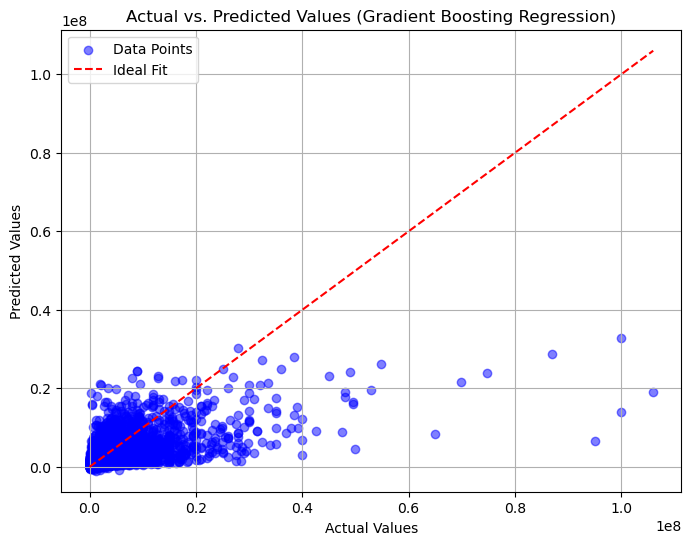

In [231]:
predictions = gb_model.predict(xtest)

# Plot the scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, predictions, color='blue', alpha=0.5, label='Data Points')

plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

plt.title('Actual vs. Predicted Values (Gradient Boosting Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [232]:
poly = PolynomialFeatures( degree=2 )
poly_features = poly.fit_transform( xtrain )

poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit( poly_features, ytrain )

poly_reg_model.score( poly_features, ytrain )

0.2107925918925223

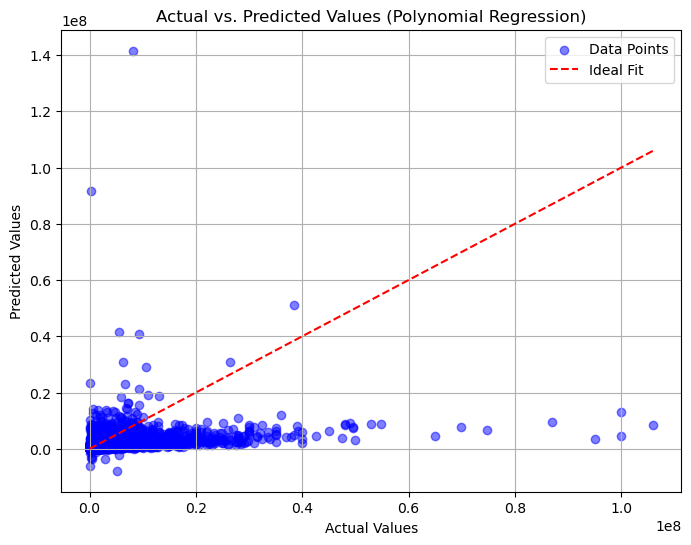

In [233]:
poly_features_test = poly.fit_transform(xtest)
predictions_poly = poly_reg_model.predict(poly_features_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, predictions_poly, color='blue', alpha=0.5, label='Data Points')

# Plot the reference line (ideal fit)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Ideal Fit')

plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()